In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
#preprocessing para llenar los datos vacios
from sklearn.impute import SimpleImputer
#modelo de separacion de datos
from sklearn.model_selection import train_test_split
#metodo de regresion lasso
from sklearn.linear_model import Lasso

In [40]:
x = pd.read_csv('x.csv')
y = x['worldwide_gross']
x = x.drop('worldwide_gross', axis=1)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state = 1)
print(f'Tamaño completo: {len(x)}')
print(f'Tamaño x entrenamiento: {len(x_train)}')
print(f'Tamaño x test: {len(x_test)}')
print(f'Tamaño y train: {len(y_train)}')
print(f'Tamaño y test: {len(y_test)}')

Tamaño completo: 4104
Tamaño x entrenamiento: 2462
Tamaño x test: 1642
Tamaño y train: 2462
Tamaño y test: 1642


In [42]:
model = Lasso()
model.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [43]:
predicted = model.predict(x_test)

In [44]:
predicted.shape

(1642,)

([array([1128.,  383.,   80.,   29.,   18.,    4.,    0.,    0.,    0.,
            0.]),
  array([1.19e+03, 3.28e+02, 6.90e+01, 2.70e+01, 1.50e+01, 8.00e+00,
         2.00e+00, 2.00e+00, 0.00e+00, 1.00e+00])],
 array([-1.22326830e+08,  9.57720757e+07,  3.13870981e+08,  5.31969887e+08,
         7.50068792e+08,  9.68167698e+08,  1.18626660e+09,  1.40436551e+09,
         1.62246441e+09,  1.84056332e+09,  2.05866222e+09]),
 <a list of 2 Lists of Patches objects>)

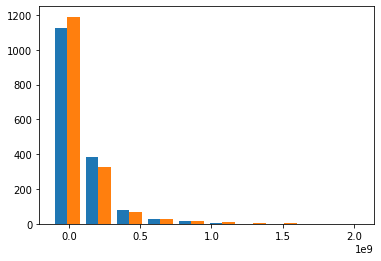

In [45]:
# graficar la prediccion y los valores reales
plt.hist([predicted, y_test])

In [46]:
model.score(x_test, y_test)

0.8432852609660314

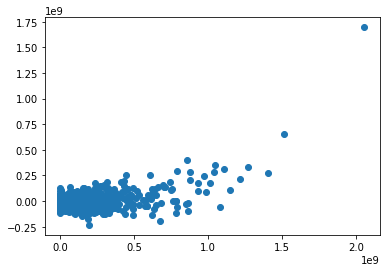

In [47]:
residuals = y_test - predicted
plt.scatter(y_test, residuals)

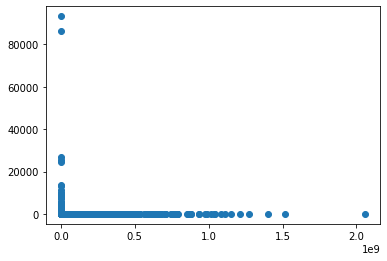

In [48]:
ap_residuals =  np.abs(residuals) / y_test
plt.scatter(y_test, ap_residuals)

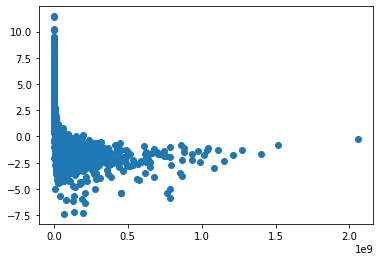

In [49]:
lap_residuals = np.log(ap_residuals)
plt.scatter(y_test, lap_residuals)

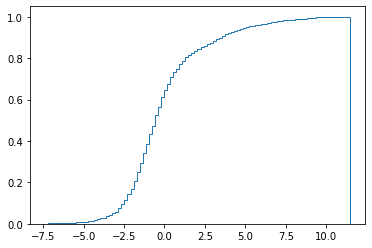

In [50]:
plt.hist(lap_residuals, bins=100, normed=1, histtype='step', cumulative=True);

array([0.13533528, 0.22313016, 0.36787944, 0.60653066, 1.        ])

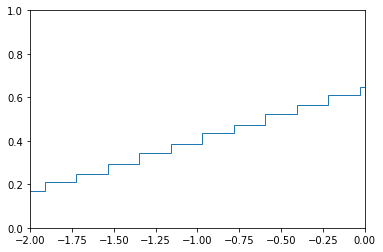

In [51]:
plt.hist(lap_residuals, bins=100, normed=1, histtype='step', cumulative=True);
plt.axis([-2, 0, 0, 1])
np.power(np.exp(1)*np.ones(5), np.linspace(-2, 0, 5))